# Wind Power in Canada

**Employer and task:**
* You’re a data scientist at windi.ly, a startup which (similar to Plastinction) works in environmental consulting and R&D in the wind power industry. They’re interested in using your data science skills to get an idea of the current Canadian wind capacity for their annual report.

**Guiding questions: These are meant to help point you in a productive direction, but remember that your ultimate task is stated above.**
* What is the current status of Canadian wind power capacity, and in what direction (if any) is it trending? Consider looking at this at multiple levels of aggregation - geography, project size, manufacturer, anything else you find interesting!
* Look at the geographical distribution of wind power, and think of ways you can concisely display those findings to stakeholders. 
* What supplemental research can you do, through understanding the domain and other developments in the field, to contextualize your work on this topic? 


## ETL

* Importing pandas and other necessary packages

* Getting percentage of NaNs in each column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

def get_proportion_null(df):
    return df.isna().sum()/len(df)

wind = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')
get_proportion_null(wind)

objectid                      0.000000
province_territory            0.000000
project_name                  0.000149
total_project_capacity_mw     0.000000
turbine_identifier            0.000000
turbine_number_in_project     0.000000
turbine_rated_capacity_k_w    0.032846
rotor_diameter_m              0.000000
hub_height_m                  0.000000
manufacturer                  0.000000
model                         0.000000
commissioning_date            0.000000
latitude                      0.000000
longitude                     0.000000
notes                         0.905345
dtype: float64

In [2]:
wind.head()

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
0,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150.0,23.0,30.0,Bonus,AN 150/30,1993,49.525354,-114.054796,NaN
1,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600.0,44.0,40.0,Vestas,V44/600,1997,49.512641,-114.035712,NaN
2,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233069,-113.654899,NaN
3,4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233034,-113.630213,NaN
4,5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.217547,-113.680161,NaN


There seems to be a large amount of NaNs in the notes section. Looking at the unique notes that are not NaN

In [3]:
wind['notes'].unique()

array([nan,
       'This farm consists of three different hub heights; with three 50 m turbines, five 60 m turbines, and twenty-seven 67 m turbines. No information available on which turbines fall into which category',
       'Derated from 3200 kW', 'Derated from 4200 kW',
       'Hub height approximated from manufacturer specifications',
       'Turbine height approximated from manufacturer specifications',
       'Turbine height assumed from turbine model',
       'Turbine height assumed',
       'Turbine height assumed based off turbine model',
       'Turbine height estimated',
       'Assumed turbine height based on similar projects/turbines',
       'Turbine derated from 1600 kW. Turbine height approximated from manufacturer specfications',
       'Turbine uprated from 1600 kW', 'Turbine derated from 2000 kW',
       'Assumed turbine model based on rated output. Assumed turbine height based on turbine model',
       'Assumed turbine height based on turbine model and similar proje

There seems to be important information here. Want to convert these notes into appropriate columns and then delete the notes column

### Dealing with Derated/Uprated Turbines

Make a column that displays if a turbine was derated, uprated, or neither

**Some of the notes do mention that "SOME turbines derated...". For the sake of time, I assumed that all were derated, but if I have extra time I will go back in and do calculations to properly derate some turbines to get the operating capacity given**

In [4]:
def derated_uprated_check(notes_str):
    
    #NaN is a float, don't apply function if the value is NaN
    if(isinstance(notes_str,float)==False):
        #checking for upper and lower case cases
        if ((notes_str.count('derate')>0) | (notes_str.count('Derate')>0)):
            return 'Derated'
        if (('uprate' in notes_str) | ('Uprate' in notes_str)):
            return 'Uprated'
    return 'Neither'
wind['derated_uprated'] = wind.notes.apply(derated_uprated_check)
wind[wind['notes'].notna()]

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated
865,866,Alberta,Kettles Hill,63.0,KEH1,1/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.522771,-113.830034,This farm consists of three different hub heig...,Neither
866,867,Alberta,Kettles Hill,63.0,KEH2,2/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.520939,-113.828362,This farm consists of three different hub heig...,Neither
867,868,Alberta,Kettles Hill,63.0,KEH3,3/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.518945,-113.826923,This farm consists of three different hub heig...,Neither
868,869,Alberta,Kettles Hill,63.0,KEH4,4/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.517464,-113.825729,This farm consists of three different hub heig...,Neither
869,870,Alberta,Kettles Hill,63.0,KEH5,5/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.515100,-113.820367,This farm consists of three different hub heig...,Neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,4220,Ontario,North Kent Wind Farm,100.0,NRK29,29/34,2772.0,113.0,99.5,Siemens,SWT 3.2-113,2018,42.489361,-82.225233,Turbine derated from 3200 kW,Derated
4220,4221,Ontario,North Kent Wind Farm,100.0,NRK30,30/34,2772.0,113.0,99.5,Siemens,SWT 3.2-113,2018,42.488546,-82.201222,Turbine derated from 3200 kW,Derated
4222,4223,Ontario,North Kent Wind Farm,100.0,NRK32,32/34,2772.0,113.0,99.5,Siemens,SWT 3.2-113,2018,42.450801,-82.231684,Turbine derated from 3200 kW,Derated
4223,4224,Ontario,North Kent Wind Farm,100.0,NRK33,33/34,2772.0,113.0,99.5,Siemens,SWT 3.2-113,2018,42.455965,-82.293344,Turbine derated from 3200 kW,Derated


### Turbine/Hub Height Approximated/Estimated/Assumed

Make a boolean column that depicts if the height was assumed

In [5]:
#Checking if it contains key words that signify the the HUB HEIGHT was assumed
def hub_height_assumed_check(notes_str):
    if(isinstance(notes_str,float)==False):
        if(('hub' in notes_str.lower()) | ('turbine' in notes_str.lower())):
            if(('approx' in notes_str.lower()) | ('assume' in notes_str.lower()) | ('estimate' in notes_str.lower())):
                return True
    return False
pd.set_option('display.max_rows', 85)
wind['hub_height_assumed'] = wind.notes.apply(hub_height_assumed_check)
wind.head()

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed
0,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150.0,23.0,30.0,Bonus,AN 150/30,1993,49.525354,-114.054796,NaN,Neither,False
1,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600.0,44.0,40.0,Vestas,V44/600,1997,49.512641,-114.035712,NaN,Neither,False
2,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233069,-113.654899,NaN,Neither,False
3,4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233034,-113.630213,NaN,Neither,False
4,5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.217547,-113.680161,NaN,Neither,False


### Rotor Diameter Approx/Estimated/Assumed

This is very similar to the previous section

In [6]:
#Checking if it contains key words that signify the the ROTOR DIAMETER was assumed
def rotor_dia_assumed_check(notes_str):
    if(isinstance(notes_str,float)==False):
        if('rotor' in notes_str.lower()):
            if(('approx' in notes_str.lower()) | ('assume' in notes_str.lower()) | ('estimate' in notes_str.lower())):
                return True
    return False
wind['rotor_dia_assumed'] = wind.notes.apply(rotor_dia_assumed_check)
wind[wind['rotor_dia_assumed']]

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
2662,2663,Ontario,Raleigh Wind Energy Centre,78.0,RWE1,1/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.321705,-82.142232,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2663,2664,Ontario,Raleigh Wind Energy Centre,78.0,RWE2,2/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.315962,-82.135726,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2664,2665,Ontario,Raleigh Wind Energy Centre,78.0,RWE3,3/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.320106,-82.162160,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2665,2666,Ontario,Raleigh Wind Energy Centre,78.0,RWE4,4/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.317418,-82.159578,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2666,2667,Ontario,Raleigh Wind Energy Centre,78.0,RWE5,5/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.310212,-82.156064,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2667,2668,Ontario,Raleigh Wind Energy Centre,78.0,RWE6,6/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.309684,-82.145854,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2668,2669,Ontario,Raleigh Wind Energy Centre,78.0,RWE7,7/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.306065,-82.171479,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2669,2670,Ontario,Raleigh Wind Energy Centre,78.0,RWE8,8/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.296641,-82.163944,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2670,2671,Ontario,Raleigh Wind Energy Centre,78.0,RWE9,9/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.303838,-82.156174,Assumed XLE model. Rotor diameter approximated.,Neither,False,True
2671,2672,Ontario,Raleigh Wind Energy Centre,78.0,RWE10,10/52,1500.0,83.0,80.0,GE,GE 1.5XLE,2011,42.293615,-82.142048,Assumed XLE model. Rotor diameter approximated.,Neither,False,True


### "Not sure which turbine..."

Many of the farms have certain turbines that are slightly different than the majority. It isn't indicated which turbines are different (output, diameter, etc.), so I will be using a random number generator to randomly assign the appropriate values to each turbine

In [7]:
wind[wind['notes']=='This farm consists of three different hub heights; with three 50 m turbines, five 60 m turbines, and twenty-seven 67 m turbines. No information available on which turbines fall into which category']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
865,866,Alberta,Kettles Hill,63.0,KEH1,1/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.522771,-113.830034,This farm consists of three different hub heig...,Neither,False,False
866,867,Alberta,Kettles Hill,63.0,KEH2,2/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.520939,-113.828362,This farm consists of three different hub heig...,Neither,False,False
867,868,Alberta,Kettles Hill,63.0,KEH3,3/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.518945,-113.826923,This farm consists of three different hub heig...,Neither,False,False
868,869,Alberta,Kettles Hill,63.0,KEH4,4/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.517464,-113.825729,This farm consists of three different hub heig...,Neither,False,False
869,870,Alberta,Kettles Hill,63.0,KEH5,5/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.515100,-113.820367,This farm consists of three different hub heig...,Neither,False,False
870,871,Alberta,Kettles Hill,63.0,KEH6,6/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.513509,-113.820004,This farm consists of three different hub heig...,Neither,False,False
871,872,Alberta,Kettles Hill,63.0,KEH7,7/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.523207,-113.823081,This farm consists of three different hub heig...,Neither,False,False
872,873,Alberta,Kettles Hill,63.0,KEH8,8/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.521356,-113.821357,This farm consists of three different hub heig...,Neither,False,False
873,874,Alberta,Kettles Hill,63.0,KEH9,9/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.519776,-113.820755,This farm consists of three different hub heig...,Neither,False,False
874,875,Alberta,Kettles Hill,63.0,KEH10,10/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.518648,-113.819725,This farm consists of three different hub heig...,Neither,False,False


In [8]:
#Thankfully, the indices are in order so I can do a random number generator without too much hassle

#Size 8 because the rest (twenty-seven) are 67.0 meters (default)
kettles_rand = np.random.choice(range(865,900), size=8, replace=False)

for i in range(0, 3):
    print(kettles_rand[i])
    wind.at[kettles_rand[i],'hub_height_m'] = 50.0
for i in range(3, 8):
    print(kettles_rand[i])
    wind.at[kettles_rand[i], 'hub_height_m'] = 60.0

869
881
889
884
899
894
874
882


In [9]:
wind[wind['notes']=='This farm consists of three different hub heights; with three 50 m turbines, five 60 m turbines, and twenty-seven 67 m turbines. No information available on which turbines fall into which category'].head()

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
865,866,Alberta,Kettles Hill,63.0,KEH1,1/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.522771,-113.830034,This farm consists of three different hub heig...,Neither,False,False
866,867,Alberta,Kettles Hill,63.0,KEH2,2/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.520939,-113.828362,This farm consists of three different hub heig...,Neither,False,False
867,868,Alberta,Kettles Hill,63.0,KEH3,3/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.518945,-113.826923,This farm consists of three different hub heig...,Neither,False,False
868,869,Alberta,Kettles Hill,63.0,KEH4,4/35,1800.0,80.0,67.0,Vestas,V80/1800,2006/2007,49.517464,-113.825729,This farm consists of three different hub heig...,Neither,False,False
869,870,Alberta,Kettles Hill,63.0,KEH5,5/35,1800.0,80.0,50.0,Vestas,V80/1800,2006/2007,49.515100,-113.820367,This farm consists of three different hub heig...,Neither,False,False


In [10]:
wind[wind['notes']=='4 of the turbines have 93 ft rotor diameter. Not known which turbines have the smaller rotor']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
2468,2469,Ontario,Chatham,101.2,CHA1,1/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.254977,-82.310993,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2469,2470,Ontario,Chatham,101.2,CHA2,2/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.237928,-82.310715,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2470,2471,Ontario,Chatham,101.2,CHA3,3/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.233594,-82.317931,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2471,2472,Ontario,Chatham,101.2,CHA4,4/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.230049,-82.313917,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2472,2473,Ontario,Chatham,101.2,CHA5,5/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.228083,-82.318713,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2473,2474,Ontario,Chatham,101.2,CHA6,6/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.227122,-82.325418,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2474,2475,Ontario,Chatham,101.2,CHA7,7/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.232053,-82.333842,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2475,2476,Ontario,Chatham,101.2,CHA8,8/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.236218,-82.334590,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2476,2477,Ontario,Chatham,101.2,CHA9,9/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.226928,-82.355229,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2477,2478,Ontario,Chatham,101.2,CHA10,10/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.234707,-82.356940,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False


In [11]:
#Similar as before but for Chatham wind turbines

chat_rand = np.random.choice(range(2468,2512), size=4, replace=False)

for i in range(0, 4):
    print(chat_rand[i])
    #The notes mention 93 FEET, but I am assuming they mean meters
    wind.at[chat_rand[i],'rotor_diameter_m'] = 93.0
    
wind[wind['notes']=='4 of the turbines have 93 ft rotor diameter. Not known which turbines have the smaller rotor']

2505
2471
2482
2499


,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
2468,2469,Ontario,Chatham,101.2,CHA1,1/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.254977,-82.310993,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2469,2470,Ontario,Chatham,101.2,CHA2,2/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.237928,-82.310715,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2470,2471,Ontario,Chatham,101.2,CHA3,3/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.233594,-82.317931,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2471,2472,Ontario,Chatham,101.2,CHA4,4/44,2300.0,93.0,80.0,Siemens,SWT 2.3-101,2011,42.230049,-82.313917,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2472,2473,Ontario,Chatham,101.2,CHA5,5/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.228083,-82.318713,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2473,2474,Ontario,Chatham,101.2,CHA6,6/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.227122,-82.325418,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2474,2475,Ontario,Chatham,101.2,CHA7,7/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.232053,-82.333842,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2475,2476,Ontario,Chatham,101.2,CHA8,8/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.236218,-82.334590,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2476,2477,Ontario,Chatham,101.2,CHA9,9/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.226928,-82.355229,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False
2477,2478,Ontario,Chatham,101.2,CHA10,10/44,2300.0,101.0,80.0,Siemens,SWT 2.3-101,2011,42.234707,-82.356940,4 of the turbines have 93 ft rotor diameter. N...,Neither,False,False


In [12]:
wind[wind['notes']=='Wind farm consists of 65 turbines with a nameplate capacity of 2221 kW and 2 turbines with a capacity of 2126 kW. Unknown which turbines have capacity of 2126 kW.']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3155,3156,Ontario,Grand Renewable Wind,148.8,GRW1,1/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.947396,-79.901881,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3156,3157,Ontario,Grand Renewable Wind,148.8,GRW2,2/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.949096,-79.896763,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3157,3158,Ontario,Grand Renewable Wind,148.8,GRW3,3/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.928539,-79.922164,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3158,3159,Ontario,Grand Renewable Wind,148.8,GRW4,4/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.924071,-79.915806,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3159,3160,Ontario,Grand Renewable Wind,148.8,GRW5,5/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.932554,-79.899573,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3160,3161,Ontario,Grand Renewable Wind,148.8,GRW6,6/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.932182,-79.896137,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3161,3162,Ontario,Grand Renewable Wind,148.8,GRW7,7/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.932010,-79.892179,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3162,3163,Ontario,Grand Renewable Wind,148.8,GRW8,8/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.913593,-79.890182,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3163,3164,Ontario,Grand Renewable Wind,148.8,GRW9,9/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.911796,-79.882833,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3164,3165,Ontario,Grand Renewable Wind,148.8,GRW10,10/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.917442,-79.880933,Wind farm consists of 65 turbines with a namep...,Neither,False,False


In [13]:
grand_rand = np.random.choice(range(3155,3222), size=2, replace=False)

for i in range(0, 2):
    print(grand_rand[i])
    #Changing to 2126 kW
    wind.at[grand_rand[i],'turbine_rated_capacity_k_w'] = 2126.0

3165
3219


In [14]:
wind[wind['notes']=='Wind farm consists of 65 turbines with a nameplate capacity of 2221 kW and 2 turbines with a capacity of 2126 kW. Unknown which turbines have capacity of 2126 kW.']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3155,3156,Ontario,Grand Renewable Wind,148.8,GRW1,1/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.947396,-79.901881,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3156,3157,Ontario,Grand Renewable Wind,148.8,GRW2,2/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.949096,-79.896763,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3157,3158,Ontario,Grand Renewable Wind,148.8,GRW3,3/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.928539,-79.922164,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3158,3159,Ontario,Grand Renewable Wind,148.8,GRW4,4/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.924071,-79.915806,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3159,3160,Ontario,Grand Renewable Wind,148.8,GRW5,5/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.932554,-79.899573,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3160,3161,Ontario,Grand Renewable Wind,148.8,GRW6,6/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.932182,-79.896137,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3161,3162,Ontario,Grand Renewable Wind,148.8,GRW7,7/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.932010,-79.892179,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3162,3163,Ontario,Grand Renewable Wind,148.8,GRW8,8/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.913593,-79.890182,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3163,3164,Ontario,Grand Renewable Wind,148.8,GRW9,9/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.911796,-79.882833,Wind farm consists of 65 turbines with a namep...,Neither,False,False
3164,3165,Ontario,Grand Renewable Wind,148.8,GRW10,10/67,2221.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.917442,-79.880933,Wind farm consists of 65 turbines with a namep...,Neither,False,False


In [15]:
wind[wind['notes']=='All turbines are identical, but 2 operate at 1815 kW and 3 at 1950 kW. No information on which turbines operate at what output.']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3346,3347,Ontario,Skyway 8,9.48,SKY1,1/5,NaN,100.0,95.0,Vestas,V100,2014,44.098066,-80.389528,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3347,3348,Ontario,Skyway 8,9.48,SKY2,2/5,NaN,100.0,95.0,Vestas,V100,2014,44.082816,-80.387988,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3348,3349,Ontario,Skyway 8,9.48,SKY3,3/5,NaN,100.0,95.0,Vestas,V100,2014,44.084143,-80.391227,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3349,3350,Ontario,Skyway 8,9.48,SKY4,4/5,NaN,100.0,95.0,Vestas,V100,2014,44.079837,-80.408605,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3350,3351,Ontario,Skyway 8,9.48,SKY5,5/5,NaN,100.0,95.0,Vestas,V100,2014,44.083755,-80.408279,"All turbines are identical, but 2 operate at 1...",Neither,False,False


In [16]:
sky_rand = np.random.choice(range(3346,3351), size=5, replace=False)

for i in range(0, 2):
    print(sky_rand[i])
    #Changing to 1815 kW
    wind.at[sky_rand[i],'turbine_rated_capacity_k_w'] = 1815.0

for i in range(2, 5):
    print(sky_rand[i])
    #Changing to 1950 kW
    wind.at[sky_rand[i],'turbine_rated_capacity_k_w'] = 1950.0

wind[wind['notes']=='All turbines are identical, but 2 operate at 1815 kW and 3 at 1950 kW. No information on which turbines operate at what output.']

3350
3348
3347
3346
3349


,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3346,3347,Ontario,Skyway 8,9.48,SKY1,1/5,1950.0,100.0,95.0,Vestas,V100,2014,44.098066,-80.389528,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3347,3348,Ontario,Skyway 8,9.48,SKY2,2/5,1950.0,100.0,95.0,Vestas,V100,2014,44.082816,-80.387988,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3348,3349,Ontario,Skyway 8,9.48,SKY3,3/5,1815.0,100.0,95.0,Vestas,V100,2014,44.084143,-80.391227,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3349,3350,Ontario,Skyway 8,9.48,SKY4,4/5,1950.0,100.0,95.0,Vestas,V100,2014,44.079837,-80.408605,"All turbines are identical, but 2 operate at 1...",Neither,False,False
3350,3351,Ontario,Skyway 8,9.48,SKY5,5/5,1815.0,100.0,95.0,Vestas,V100,2014,44.083755,-80.408279,"All turbines are identical, but 2 operate at 1...",Neither,False,False


Some other NaNs will be looked into now

In [17]:
get_proportion_null(wind)

objectid                      0.000000
province_territory            0.000000
project_name                  0.000149
total_project_capacity_mw     0.000000
turbine_identifier            0.000000
turbine_number_in_project     0.000000
turbine_rated_capacity_k_w    0.032099
rotor_diameter_m              0.000000
hub_height_m                  0.000000
manufacturer                  0.000000
model                         0.000000
commissioning_date            0.000000
latitude                      0.000000
longitude                     0.000000
notes                         0.905345
derated_uprated               0.000000
hub_height_assumed            0.000000
rotor_dia_assumed             0.000000
dtype: float64

### Dealing with Turbine Capacity NaNs

There are still about 3% NaNs in turbine capacity. I will look further and deal with it accordingly

In [18]:
wind[wind['turbine_rated_capacity_k_w'].isna()]

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3361,3362,Ontario,South Kent Wind Farm,270.0,SKW1,1/124,NaN,101.0,99.5,Siemens,SWT 2.3-101,2014,42.242904,-82.424768,Some turbines derated such that the farm has a...,Derated,False,False
3362,3363,Ontario,South Kent Wind Farm,270.0,SKW2,2/124,NaN,101.0,99.5,Siemens,SWT 2.3-101,2014,42.236607,-82.425718,Some turbines derated such that the farm has a...,Derated,False,False
3363,3364,Ontario,South Kent Wind Farm,270.0,SKW3,3/124,NaN,101.0,99.5,Siemens,SWT 2.3-101,2014,42.228329,-82.417275,Some turbines derated such that the farm has a...,Derated,False,False
3364,3365,Ontario,South Kent Wind Farm,270.0,SKW4,4/124,NaN,101.0,99.5,Siemens,SWT 2.3-101,2014,42.220228,-82.426195,Some turbines derated such that the farm has a...,Derated,False,False
3365,3366,Ontario,South Kent Wind Farm,270.0,SKW5,5/124,NaN,101.0,99.5,Siemens,SWT 2.3-101,2014,42.238933,-82.399346,Some turbines derated such that the farm has a...,Derated,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,3581,Ontario,Armow Wind Project,180.0,AMW87,87/91,NaN,101.0,99.5,Siemens,SWT 2.3-101,2015,44.238499,-81.442190,Some turbines derated such that the farm has a...,Derated,False,False
3581,3582,Ontario,Armow Wind Project,180.0,AMW88,88/91,NaN,101.0,99.5,Siemens,SWT 2.3-101,2015,44.239546,-81.438842,Some turbines derated such that the farm has a...,Derated,False,False
3582,3583,Ontario,Armow Wind Project,180.0,AMW89,89/91,NaN,101.0,99.5,Siemens,SWT 2.3-101,2015,44.242069,-81.416518,Some turbines derated such that the farm has a...,Derated,False,False
3583,3584,Ontario,Armow Wind Project,180.0,AMW90,90/91,NaN,101.0,99.5,Siemens,SWT 2.3-101,2015,44.239606,-81.415994,Some turbines derated such that the farm has a...,Derated,False,False


Based on this, it looks like South Kent Wind Farm and Armow Wind Project were the ones that were labeled as some turbines being derated for a total project of 270 or 180 MW, respectively. To fill the NaN, I will just divide 270 and 180 MW by the amount of turbines to get the number in kW. 

South Kent yielded an average capacity of 2177 kW. Through further research, I discovered that the SW 2.3-101 model had a maximum output of 2300 kW, so I will add that as a note.

The Armow Wind Project yielded an average capacity of 1978 kW. This had the same model as South Kent, so I will add a note here as well.

This shined some light on another project, Belle River, which had a note depicting that some turbines were derated for a total of 100 MW. Doing similar math to the others, it yielded an average turbine capacity of 2500 kW. 

In [19]:
get_proportion_null(wind)

objectid                      0.000000
province_territory            0.000000
project_name                  0.000149
total_project_capacity_mw     0.000000
turbine_identifier            0.000000
turbine_number_in_project     0.000000
turbine_rated_capacity_k_w    0.032099
rotor_diameter_m              0.000000
hub_height_m                  0.000000
manufacturer                  0.000000
model                         0.000000
commissioning_date            0.000000
latitude                      0.000000
longitude                     0.000000
notes                         0.905345
derated_uprated               0.000000
hub_height_assumed            0.000000
rotor_dia_assumed             0.000000
dtype: float64

In [20]:
wind.groupby('commissioning_date').sum()['turbine_rated_capacity_k_w'].sum()

12753506.0

In [21]:
wind[wind['notes']=='Some turbines derated such that wind farm has maximum capacity of 100 MW']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
4114,4115,Ontario,Belle River,100.0,BEL1,1/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.251402,-82.569474,Some turbines derated such that wind farm has ...,Derated,False,False
4115,4116,Ontario,Belle River,100.0,BEL2,2/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.251244,-82.579833,Some turbines derated such that wind farm has ...,Derated,False,False
4116,4117,Ontario,Belle River,100.0,BEL3,3/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.251301,-82.586711,Some turbines derated such that wind farm has ...,Derated,False,False
4117,4118,Ontario,Belle River,100.0,BEL4,4/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.252605,-82.590784,Some turbines derated such that wind farm has ...,Derated,False,False
4118,4119,Ontario,Belle River,100.0,BEL5,5/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.248584,-82.590504,Some turbines derated such that wind farm has ...,Derated,False,False
4119,4120,Ontario,Belle River,100.0,BEL6,6/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.262963,-82.571933,Some turbines derated such that wind farm has ...,Derated,False,False
4120,4121,Ontario,Belle River,100.0,BEL7,7/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.247545,-82.612262,Some turbines derated such that wind farm has ...,Derated,False,False
4121,4122,Ontario,Belle River,100.0,BEL8,8/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.244150,-82.609584,Some turbines derated such that wind farm has ...,Derated,False,False
4122,4123,Ontario,Belle River,100.0,BEL9,9/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.241991,-82.628204,Some turbines derated such that wind farm has ...,Derated,False,False
4123,4124,Ontario,Belle River,100.0,BEL10,10/40,3200.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.236830,-82.627577,Some turbines derated such that wind farm has ...,Derated,False,False


In [22]:
#Changing South Kent
wind.loc[wind['project_name']=='South Kent Wind Farm', 'turbine_rated_capacity_k_w'] = 2177.0
wind[wind['project_name']=='South Kent Wind Farm']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3361,3362,Ontario,South Kent Wind Farm,270.0,SKW1,1/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.242904,-82.424768,Some turbines derated such that the farm has a...,Derated,False,False
3362,3363,Ontario,South Kent Wind Farm,270.0,SKW2,2/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.236607,-82.425718,Some turbines derated such that the farm has a...,Derated,False,False
3363,3364,Ontario,South Kent Wind Farm,270.0,SKW3,3/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.228329,-82.417275,Some turbines derated such that the farm has a...,Derated,False,False
3364,3365,Ontario,South Kent Wind Farm,270.0,SKW4,4/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.220228,-82.426195,Some turbines derated such that the farm has a...,Derated,False,False
3365,3366,Ontario,South Kent Wind Farm,270.0,SKW5,5/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.238933,-82.399346,Some turbines derated such that the farm has a...,Derated,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,3481,Ontario,South Kent Wind Farm,270.0,SKW120,120/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.351623,-81.881239,Some turbines derated such that the farm has a...,Derated,False,False
3481,3482,Ontario,South Kent Wind Farm,270.0,SKW121,121/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.348536,-81.881308,Some turbines derated such that the farm has a...,Derated,False,False
3482,3483,Ontario,South Kent Wind Farm,270.0,SKW122,122/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.345509,-81.882757,Some turbines derated such that the farm has a...,Derated,False,False
3483,3484,Ontario,South Kent Wind Farm,270.0,SKW123,123/124,2177.0,101.0,99.5,Siemens,SWT 2.3-101,2014,42.337245,-81.901304,Some turbines derated such that the farm has a...,Derated,False,False


In [23]:
#Changing Armow
wind.loc[wind['project_name']=='Armow Wind Project', 'turbine_rated_capacity_k_w'] = 1978.0
wind[wind['project_name']=='Armow Wind Project']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
3494,3495,Ontario,Armow Wind Project,180.0,AMW1,1/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.177354,-81.538791,Some turbines derated such that the farm has a...,Derated,False,False
3495,3496,Ontario,Armow Wind Project,180.0,AMW2,2/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.171909,-81.535523,Some turbines derated such that the farm has a...,Derated,False,False
3496,3497,Ontario,Armow Wind Project,180.0,AMW3,3/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.168779,-81.526822,Some turbines derated such that the farm has a...,Derated,False,False
3497,3498,Ontario,Armow Wind Project,180.0,AMW4,4/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.167040,-81.520451,Some turbines derated such that the farm has a...,Derated,False,False
3498,3499,Ontario,Armow Wind Project,180.0,AMW5,5/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.164214,-81.517439,Some turbines derated such that the farm has a...,Derated,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,3581,Ontario,Armow Wind Project,180.0,AMW87,87/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.238499,-81.442190,Some turbines derated such that the farm has a...,Derated,False,False
3581,3582,Ontario,Armow Wind Project,180.0,AMW88,88/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.239546,-81.438842,Some turbines derated such that the farm has a...,Derated,False,False
3582,3583,Ontario,Armow Wind Project,180.0,AMW89,89/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.242069,-81.416518,Some turbines derated such that the farm has a...,Derated,False,False
3583,3584,Ontario,Armow Wind Project,180.0,AMW90,90/91,1978.0,101.0,99.5,Siemens,SWT 2.3-101,2015,44.239606,-81.415994,Some turbines derated such that the farm has a...,Derated,False,False


In [24]:
wind.groupby('commissioning_date').sum()['turbine_rated_capacity_k_w'].sum()

13203452.0

In [25]:
#Changing Belle River
wind.loc[wind['project_name']=='Belle River', 'turbine_rated_capacity_k_w'] = 2500.0
wind[wind['project_name']=='Belle River']

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
4114,4115,Ontario,Belle River,100.0,BEL1,1/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.251402,-82.569474,Some turbines derated such that wind farm has ...,Derated,False,False
4115,4116,Ontario,Belle River,100.0,BEL2,2/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.251244,-82.579833,Some turbines derated such that wind farm has ...,Derated,False,False
4116,4117,Ontario,Belle River,100.0,BEL3,3/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.251301,-82.586711,Some turbines derated such that wind farm has ...,Derated,False,False
4117,4118,Ontario,Belle River,100.0,BEL4,4/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.252605,-82.590784,Some turbines derated such that wind farm has ...,Derated,False,False
4118,4119,Ontario,Belle River,100.0,BEL5,5/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.248584,-82.590504,Some turbines derated such that wind farm has ...,Derated,False,False
4119,4120,Ontario,Belle River,100.0,BEL6,6/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.262963,-82.571933,Some turbines derated such that wind farm has ...,Derated,False,False
4120,4121,Ontario,Belle River,100.0,BEL7,7/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.247545,-82.612262,Some turbines derated such that wind farm has ...,Derated,False,False
4121,4122,Ontario,Belle River,100.0,BEL8,8/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.244150,-82.609584,Some turbines derated such that wind farm has ...,Derated,False,False
4122,4123,Ontario,Belle River,100.0,BEL9,9/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.241991,-82.628204,Some turbines derated such that wind farm has ...,Derated,False,False
4123,4124,Ontario,Belle River,100.0,BEL10,10/40,2500.0,113.0,99.5,Siemens,SWT 3.2-113,2017,42.236830,-82.627577,Some turbines derated such that wind farm has ...,Derated,False,False


In [26]:
get_proportion_null(wind)

objectid                      0.000000
province_territory            0.000000
project_name                  0.000149
total_project_capacity_mw     0.000000
turbine_identifier            0.000000
turbine_number_in_project     0.000000
turbine_rated_capacity_k_w    0.000000
rotor_diameter_m              0.000000
hub_height_m                  0.000000
manufacturer                  0.000000
model                         0.000000
commissioning_date            0.000000
latitude                      0.000000
longitude                     0.000000
notes                         0.905345
derated_uprated               0.000000
hub_height_assumed            0.000000
rotor_dia_assumed             0.000000
dtype: float64

### Project Name NaN Values

Now looking at the last bit of NaN values

In [27]:
wind[wind['project_name'].isna()]

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
1450,1451,Newfoundland and Labrador,NaN,27.0,STL1,1/9,3000.0,90.0,80.0,Vestas,V90,2008,46.968007,-55.428683,NaN,Neither,False,False


In [28]:
wind.loc[1445:1455]

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
1445,1446,Newfoundland and Labrador,Ramea,0.39,RAM2,2/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.523086,-57.397821,NaN,Neither,False,False
1446,1447,Newfoundland and Labrador,Ramea,0.39,RAM3,3/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522779,-57.397676,NaN,Neither,False,False
1447,1448,Newfoundland and Labrador,Ramea,0.39,RAM4,4/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522462,-57.398825,NaN,Neither,False,False
1448,1449,Newfoundland and Labrador,Ramea,0.39,RAM5,5/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522229,-57.398471,NaN,Neither,False,False
1449,1450,Newfoundland and Labrador,Ramea,0.39,RAM6,6/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522256,-57.397244,NaN,Neither,False,False
1450,1451,Newfoundland and Labrador,NaN,27.00,STL1,1/9,3000.0,90.0,80.0,Vestas,V90,2008,46.968007,-55.428683,NaN,Neither,False,False
1451,1452,Newfoundland and Labrador,St. Lawrence,27.00,STL2,2/9,3000.0,90.0,80.0,Vestas,V90,2008,46.965958,-55.426824,NaN,Neither,False,False
1452,1453,Newfoundland and Labrador,St. Lawrence,27.00,STL3,3/9,3000.0,90.0,80.0,Vestas,V90,2008,46.963797,-55.425298,NaN,Neither,False,False
1453,1454,Newfoundland and Labrador,St. Lawrence,27.00,STL4,4/9,3000.0,90.0,80.0,Vestas,V90,2008,46.961292,-55.426575,NaN,Neither,False,False
1454,1455,Newfoundland and Labrador,St. Lawrence,27.00,STL5,5/9,3000.0,90.0,80.0,Vestas,V90,2008,46.958974,-55.422809,NaN,Neither,False,False


This simply looks to be a value that was missing. Based on it being the first turbine in a 9 turbine project, the project name should be St. Lawrence. I'll use the backfill option

In [29]:
wind.loc[:,'project_name'] = wind.loc[:,'project_name'].bfill()
wind.loc[1445:1455]

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,derated_uprated,hub_height_assumed,rotor_dia_assumed
1445,1446,Newfoundland and Labrador,Ramea,0.39,RAM2,2/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.523086,-57.397821,NaN,Neither,False,False
1446,1447,Newfoundland and Labrador,Ramea,0.39,RAM3,3/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522779,-57.397676,NaN,Neither,False,False
1447,1448,Newfoundland and Labrador,Ramea,0.39,RAM4,4/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522462,-57.398825,NaN,Neither,False,False
1448,1449,Newfoundland and Labrador,Ramea,0.39,RAM5,5/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522229,-57.398471,NaN,Neither,False,False
1449,1450,Newfoundland and Labrador,Ramea,0.39,RAM6,6/6,65.0,15.5,24.5,Windmatic,WM15S,2004,47.522256,-57.397244,NaN,Neither,False,False
1450,1451,Newfoundland and Labrador,St. Lawrence,27.00,STL1,1/9,3000.0,90.0,80.0,Vestas,V90,2008,46.968007,-55.428683,NaN,Neither,False,False
1451,1452,Newfoundland and Labrador,St. Lawrence,27.00,STL2,2/9,3000.0,90.0,80.0,Vestas,V90,2008,46.965958,-55.426824,NaN,Neither,False,False
1452,1453,Newfoundland and Labrador,St. Lawrence,27.00,STL3,3/9,3000.0,90.0,80.0,Vestas,V90,2008,46.963797,-55.425298,NaN,Neither,False,False
1453,1454,Newfoundland and Labrador,St. Lawrence,27.00,STL4,4/9,3000.0,90.0,80.0,Vestas,V90,2008,46.961292,-55.426575,NaN,Neither,False,False
1454,1455,Newfoundland and Labrador,St. Lawrence,27.00,STL5,5/9,3000.0,90.0,80.0,Vestas,V90,2008,46.958974,-55.422809,NaN,Neither,False,False


In [30]:
get_proportion_null(wind)

objectid                      0.000000
province_territory            0.000000
project_name                  0.000000
total_project_capacity_mw     0.000000
turbine_identifier            0.000000
turbine_number_in_project     0.000000
turbine_rated_capacity_k_w    0.000000
rotor_diameter_m              0.000000
hub_height_m                  0.000000
manufacturer                  0.000000
model                         0.000000
commissioning_date            0.000000
latitude                      0.000000
longitude                     0.000000
notes                         0.905345
derated_uprated               0.000000
hub_height_assumed            0.000000
rotor_dia_assumed             0.000000
dtype: float64

No more NaN values :D. All that is left is to delete the notes column.

In [31]:
wind = wind.drop('notes', axis=1)
wind.head()

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,derated_uprated,hub_height_assumed,rotor_dia_assumed
0,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150.0,23.0,30.0,Bonus,AN 150/30,1993,49.525354,-114.054796,Neither,False,False
1,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600.0,44.0,40.0,Vestas,V44/600,1997,49.512641,-114.035712,Neither,False,False
2,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233069,-113.654899,Neither,False,False
3,4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233034,-113.630213,Neither,False,False
4,5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.217547,-113.680161,Neither,False,False


### Project Size
I wanted to create one more column that highlighted the size of the particular project. I'll be using the split function on the turibne number in project

In [32]:
wind['project_size'] = wind.turbine_number_in_project.apply(lambda x: x.split('/')[1])
wind.head()

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,derated_uprated,hub_height_assumed,rotor_dia_assumed,project_size
0,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150.0,23.0,30.0,Bonus,AN 150/30,1993,49.525354,-114.054796,Neither,False,False,2
1,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600.0,44.0,40.0,Vestas,V44/600,1997,49.512641,-114.035712,Neither,False,False,60
2,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233069,-113.654899,Neither,False,False,6
3,4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.233034,-113.630213,Neither,False,False,6
4,5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600.0,44.0,50.0,Vestas,V44/600,1998,49.217547,-113.680161,Neither,False,False,6


### Reordering Columns
I wanted to reorder all the new columns I created and ones that were already there.

In [33]:
wind.columns

Index(['objectid', 'province_territory', 'project_name',
       'total_project_capacity_mw', 'turbine_identifier',
       'turbine_number_in_project', 'turbine_rated_capacity_k_w',
       'rotor_diameter_m', 'hub_height_m', 'manufacturer', 'model',
       'commissioning_date', 'latitude', 'longitude', 'derated_uprated',
       'hub_height_assumed', 'rotor_dia_assumed', 'project_size'],
      dtype='object')

In [34]:
wind = wind[['objectid', 'province_territory', 'project_name','project_size',
       'commissioning_date',
       'total_project_capacity_mw', 'turbine_identifier',
       'turbine_number_in_project', 'turbine_rated_capacity_k_w', 'derated_uprated',
       'rotor_diameter_m', 'rotor_dia_assumed', 'hub_height_m',
       'hub_height_assumed', 'latitude', 'longitude', 'manufacturer', 'model']]
wind.head()

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model
0,1,Alberta,Optimist Wind Energy,2,1993,0.90,OWE1,1/2,150.0,Neither,23.0,False,30.0,False,49.525354,-114.054796,Bonus,AN 150/30
1,2,Alberta,Castle River Wind Farm,60,1997,44.00,CRW1,1/60,600.0,Neither,44.0,False,40.0,False,49.512641,-114.035712,Vestas,V44/600
2,3,Alberta,Waterton Wind Turbines,6,1998,3.78,WWT1,1/6,600.0,Neither,44.0,False,50.0,False,49.233069,-113.654899,Vestas,V44/600
3,4,Alberta,Waterton Wind Turbines,6,1998,3.78,WWT2,2/6,600.0,Neither,44.0,False,50.0,False,49.233034,-113.630213,Vestas,V44/600
4,5,Alberta,Waterton Wind Turbines,6,1998,3.78,WWT3,3/6,600.0,Neither,44.0,False,50.0,False,49.217547,-113.680161,Vestas,V44/600


### Converting Commissioning Date

Some of the turbines have a slash in the date. Luckily, it is pretty easy to find how many turbines were constructed each year for a certain project

In [35]:
wind[wind['commissioning_date'].str.contains('/',na=False)]

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model
806,807,Alberta,Castle River Wind Farm,60,2000/2001,44.00,CRW2,2/60,660.0,Neither,47.0,False,50.0,False,49.512581,-114.025663,Vestas,V47/660
807,808,Alberta,Castle River Wind Farm,60,2000/2001,44.00,CRW3,3/60,660.0,Neither,47.0,False,50.0,False,49.511709,-114.025631,Vestas,V47/660
808,809,Alberta,Castle River Wind Farm,60,2000/2001,44.00,CRW4,4/60,660.0,Neither,47.0,False,50.0,False,49.510756,-114.025642,Vestas,V47/660
809,810,Alberta,Castle River Wind Farm,60,2000/2001,44.00,CRW5,5/60,660.0,Neither,47.0,False,50.0,False,49.509851,-114.025673,Vestas,V47/660
810,811,Alberta,Castle River Wind Farm,60,2000/2001,44.00,CRW6,6/60,660.0,Neither,47.0,False,50.0,False,49.509059,-114.025618,Vestas,V47/660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,6692,Saskatchewan,Cypress,16,2001/2003,10.56,CYP12,12/16,660.0,Neither,47.0,False,50.0,False,49.966179,-108.640715,Vestas,V47
6692,6693,Saskatchewan,Cypress,16,2001/2003,10.56,CYP13,13/16,660.0,Neither,47.0,False,50.0,False,50.021792,-108.535459,Vestas,V47
6693,6694,Saskatchewan,Cypress,16,2001/2003,10.56,CYP14,14/16,660.0,Neither,47.0,False,50.0,False,50.019248,-108.533930,Vestas,V47
6694,6695,Saskatchewan,Cypress,16,2001/2003,10.56,CYP15,15/16,660.0,Neither,47.0,False,50.0,False,50.015566,-108.532063,Vestas,V47


Below code is simply going through each project and changing the years according to prior research

In [36]:
#Castle River Wind Farm
#15 in 2000, 44 in 2001
wind.loc[806:820, 'commissioning_date'] = 2000
wind.loc[821:864, 'commissioning_date'] = 2001
wind[wind['project_name']=='Castle River Wind Farm']

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model
1,2,Alberta,Castle River Wind Farm,60,1997,44.0,CRW1,1/60,600.0,Neither,44.0,False,40.0,False,49.512641,-114.035712,Vestas,V44/600
806,807,Alberta,Castle River Wind Farm,60,2000,44.0,CRW2,2/60,660.0,Neither,47.0,False,50.0,False,49.512581,-114.025663,Vestas,V47/660
807,808,Alberta,Castle River Wind Farm,60,2000,44.0,CRW3,3/60,660.0,Neither,47.0,False,50.0,False,49.511709,-114.025631,Vestas,V47/660
808,809,Alberta,Castle River Wind Farm,60,2000,44.0,CRW4,4/60,660.0,Neither,47.0,False,50.0,False,49.510756,-114.025642,Vestas,V47/660
809,810,Alberta,Castle River Wind Farm,60,2000,44.0,CRW5,5/60,660.0,Neither,47.0,False,50.0,False,49.509851,-114.025673,Vestas,V47/660
810,811,Alberta,Castle River Wind Farm,60,2000,44.0,CRW6,6/60,660.0,Neither,47.0,False,50.0,False,49.509059,-114.025618,Vestas,V47/660
811,812,Alberta,Castle River Wind Farm,60,2000,44.0,CRW7,7/60,660.0,Neither,47.0,False,50.0,False,49.508186,-114.025676,Vestas,V47/660
812,813,Alberta,Castle River Wind Farm,60,2000,44.0,CRW8,8/60,660.0,Neither,47.0,False,50.0,False,49.507222,-114.025633,Vestas,V47/660
813,814,Alberta,Castle River Wind Farm,60,2000,44.0,CRW9,9/60,660.0,Neither,47.0,False,50.0,False,49.506298,-114.025652,Vestas,V47/660
814,815,Alberta,Castle River Wind Farm,60,2000,44.0,CRW10,10/60,660.0,Neither,47.0,False,50.0,False,49.505412,-114.025619,Vestas,V47/660


In [37]:
#Kettles Hill
#5 in 2006, 30 in 2007
wind.loc[865:869, 'commissioning_date'] = 2006
wind.loc[870:899, 'commissioning_date'] = 2007

In [38]:
#St. Leon
#12 in 2005, 51 in 2006, and 10 in 2012
wind.loc[1252:1263, 'commissioning_date'] = 2005
wind.loc[1264:1314, 'commissioning_date'] = 2006
wind.loc[1315:1324, 'commissioning_date'] = 2012

In [39]:
#Pubnico Point
#2 in 2004, 15 in 2005
wind.loc[1768:1769, 'commissioning_date'] = 2004
wind.loc[1770:1784, 'commissioning_date'] = 2005

In [40]:
#Ferndale
#1 in 2002, 2 in 2006
wind.loc[4312, 'commissioning_date'] = 2002
wind.loc[4313:4314, 'commissioning_date'] = 2006

In [41]:
#Melancthon
#45 in 2006, 88 in 2008
wind.loc[4315:4359, 'commissioning_date'] = 2006
wind.loc[4360:4447, 'commissioning_date'] = 2008

In [42]:
#Mont Copper
#5 in 2004, 25 in 2005
wind.loc[6011:6015, 'commissioning_date'] = 2004
wind.loc[6016:6040, 'commissioning_date'] = 2005

In [43]:
#Gros-Morne
#67 in 2011, 74 in 2012
wind.loc[6041:6107, 'commissioning_date'] = 2011
wind.loc[6108:6181, 'commissioning_date'] = 2012

In [44]:
#Seigneurie de Beaupré
#28 in 2013, 126 in 2014
wind.loc[6182:6209, 'commissioning_date'] = 2013
wind.loc[6210:6335, 'commissioning_date'] = 2014

In [45]:
#Rivière-du-Moulin
#75 in 2014, 100 in 2015
wind.loc[6336:6410, 'commissioning_date'] = 2014
wind.loc[6411:6510, 'commissioning_date'] = 2015

In [46]:
#Témiscouata
#10 in 2014, 22 in 2015
wind.loc[6511:6520, 'commissioning_date'] = 2014
wind.loc[6521:6542, 'commissioning_date'] = 2015

In [47]:
#Cypress
#9 in 2001, 7 in 2003
wind.loc[6680:6688, 'commissioning_date'] = 2001
wind.loc[6689:6695, 'commissioning_date'] = 2003

In [48]:
wind[wind['commissioning_date'].str.contains('/',na=False)]

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model


Dates are now fixed.

### Converting dtypes

In [49]:
#Changing project size to float
wind = wind.astype({'project_size':'int64'})
#Commisioning date to float
wind = wind.astype({'commissioning_date':'int64'})


### Manufacturer
Acciona and Acciona Wind Power are the same company, going to combine them

In [50]:
wind.loc[wind['manufacturer']=='Acciona Wind Power','manufacturer'] = 'Acciona'
wind[wind['manufacturer'].str.contains('Acciona')]

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model
1408,1409,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP1,1/30,1500.0,Neither,77.0,False,80.0,False,47.875880,-64.615229,Acciona,AW-1500/77
1409,1410,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP2,2/30,1500.0,Neither,77.0,False,80.0,False,47.873199,-64.612011,Acciona,AW-1500/77
1410,1411,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP3,3/30,1500.0,Neither,77.0,False,80.0,False,47.869904,-64.611459,Acciona,AW-1500/77
1411,1412,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP4,4/30,1500.0,Neither,77.0,False,80.0,False,47.866612,-64.610927,Acciona,AW-1500/77
1412,1413,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP5,5/30,1500.0,Neither,77.0,False,80.0,False,47.869759,-64.623774,Acciona,AW-1500/77
1413,1414,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP6,6/30,1500.0,Neither,77.0,False,80.0,False,47.866884,-64.623023,Acciona,AW-1500/77
1414,1415,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP7,7/30,1500.0,Neither,77.0,False,80.0,False,47.864141,-64.620344,Acciona,AW-1500/77
1415,1416,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP8,8/30,1500.0,Neither,77.0,False,80.0,False,47.861501,-64.619712,Acciona,AW-1500/77
1416,1417,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP9,9/30,1500.0,Neither,77.0,False,80.0,False,47.864390,-64.600577,Acciona,AW-1500/77
1417,1418,New Brunswick,Lamèque Wind Power Project,30,2011,45.0,LWP10,10/30,1500.0,Neither,77.0,False,80.0,False,47.856019,-64.599177,Acciona,AW-1500/77


### Writing to a .csv

In [51]:
wind.to_csv('modified_turbines.csv')

## Data Analysis

### Starting with Scatter Matrix



In [52]:
#Wanted to explore this specifically for correlation between certain variables. 
#Looking at derated/uprated things may skew results
wind_neither = wind[wind['derated_uprated']=='Neither']
wind_neither.sort_values('commissioning_date')

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model
0,1,Alberta,Optimist Wind Energy,2,1993,0.90,OWE1,1/2,150.0,Neither,23.0,False,30.0,False,49.525354,-114.054796,Bonus,AN 150/30
6696,6697,Yukon,Haeckel Hill,2,1993,0.81,HAH1,1/2,150.0,Neither,23.0,False,30.0,False,60.748818,-135.229274,Bonus,B23/150
1785,1786,Ontario,Tiverton,1,1995,0.60,TIV1,1/1,600.0,Neither,43.0,False,50.0,False,44.312925,-81.548357,Tacke,TW 600
1,2,Alberta,Castle River Wind Farm,60,1997,44.00,CRW1,1/60,600.0,Neither,44.0,False,40.0,False,49.512641,-114.035712,Vestas,V44/600
2,3,Alberta,Waterton Wind Turbines,6,1998,3.78,WWT1,1/6,600.0,Neither,44.0,False,50.0,False,49.233069,-113.654899,Vestas,V44/600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,4258,Ontario,Henvey Inlet Wind Farm,87,2019,300.00,HIW33,33/87,3450.0,Neither,136.0,False,132.0,False,45.874473,-80.622515,Vestas,V136/3450
4256,4257,Ontario,Henvey Inlet Wind Farm,87,2019,300.00,HIW32,32/87,3450.0,Neither,136.0,False,132.0,False,45.870074,-80.627630,Vestas,V136/3450
4255,4256,Ontario,Henvey Inlet Wind Farm,87,2019,300.00,HIW31,31/87,3450.0,Neither,136.0,False,132.0,False,45.871493,-80.634779,Vestas,V136/3450
4268,4269,Ontario,Henvey Inlet Wind Farm,87,2019,300.00,HIW44,44/87,3450.0,Neither,136.0,False,132.0,False,45.820389,-80.676093,Vestas,V136/3450


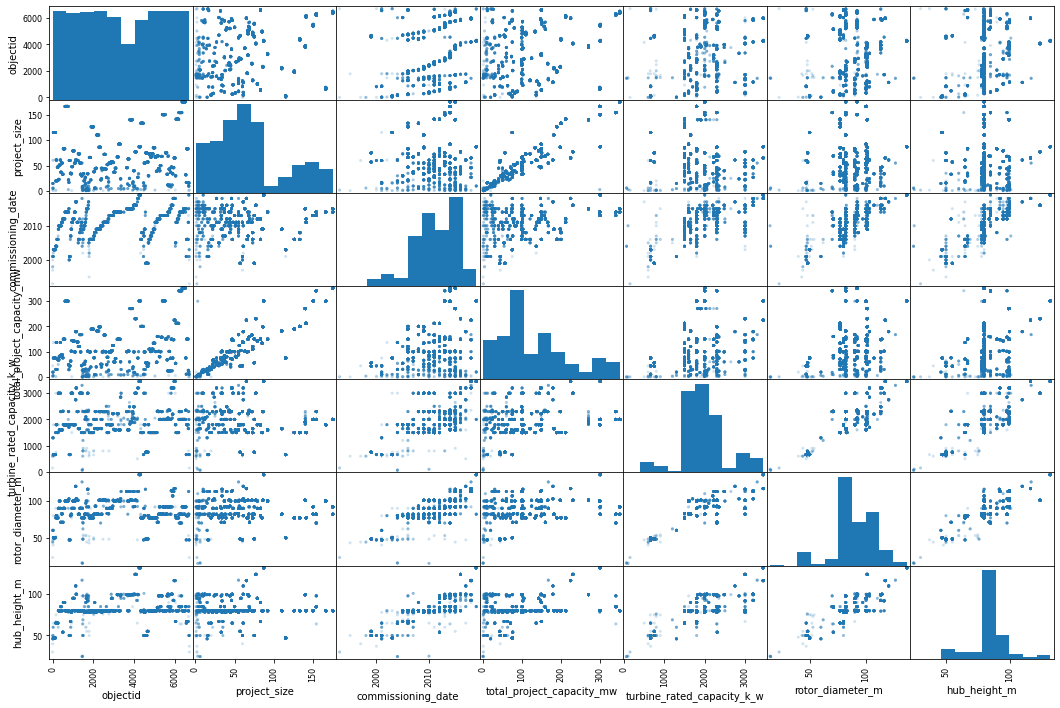

In [53]:
wind_neither_scatmat = pd.plotting.scatter_matrix(wind_neither[['objectid', 'project_size',
       'commissioning_date', 'total_project_capacity_mw', 
       'turbine_rated_capacity_k_w',
       'rotor_diameter_m', 
       'hub_height_m']], figsize=(18,12), alpha=0.2)

Text(0.5, 1.0, 'Do Larger Projects Produce More Total Power?')

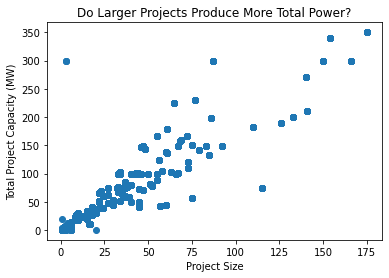

In [54]:
#Wanted to focux on total project capacity and project size
fig, ax = plt.subplots()
ax.scatter(wind_neither['project_size'], wind_neither['total_project_capacity_mw'])

ax.set_xlabel('Project Size')
ax.set_ylabel('Total Project Capacity (MW)')
ax.set_title('Do Larger Projects Produce More Total Power?')

Noticed an insane outlier (~3 project size but 300 MW of power??). Decided to look into it

In [55]:
wind[(wind['project_size']<=5) & (wind['total_project_capacity_mw']>=275)]

,objectid,province_territory,project_name,project_size,commissioning_date,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,derated_uprated,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,manufacturer,model
766,767,Alberta,Box Springs Wind Project,3,2014,298.8,BSW1,1/3,2000.0,Neither,90.0,False,78.0,False,50.105026,-110.727570,Gamesa,G90/2000
767,768,Alberta,Box Springs Wind Project,3,2014,298.8,BSW2,2/3,2000.0,Neither,90.0,False,78.0,False,50.099953,-110.727353,Gamesa,G90/2000
768,769,Alberta,Box Springs Wind Project,3,2014,298.8,BSW3,3/3,2000.0,Neither,90.0,False,78.0,False,50.099815,-110.716296,Gamesa,G90/2000


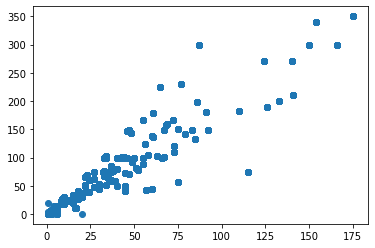

In [56]:
#Research showed that this particular project produced a total project capacity of 6MW
wind.loc[wind['project_name']=='Box Springs Wind Project', 'total_project_capacity_mw'] = 6.0
fig, ax = plt.subplots()
ax.scatter(wind['project_size'], wind['total_project_capacity_mw'])

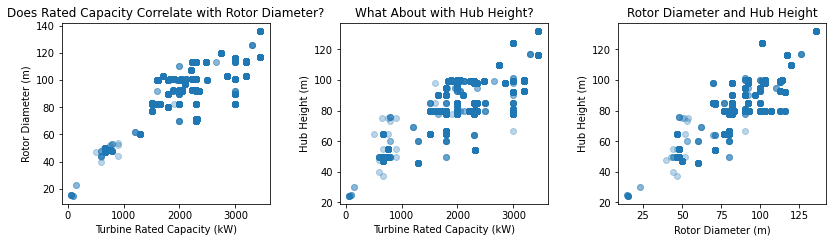

In [72]:
fig, axs = plt.subplots(1,3, figsize=[12,4])
axs[0].scatter(wind_neither['turbine_rated_capacity_k_w'],wind_neither['rotor_diameter_m'], alpha=0.3)
axs[1].scatter(wind_neither['turbine_rated_capacity_k_w'],wind_neither['hub_height_m'], alpha=0.3)
axs[2].scatter(wind_neither['rotor_diameter_m'],wind_neither['hub_height_m'], alpha=0.3)

axs[0].set_xlabel('Turbine Rated Capacity (kW)')
axs[1].set_xlabel('Turbine Rated Capacity (kW)')
axs[2].set_xlabel('Rotor Diameter (m)')

axs[0].set_ylabel('Rotor Diameter (m)')
axs[1].set_ylabel('Hub Height (m)')
axs[2].set_ylabel('Hub Height (m)')

axs[0].set_title('Does Rated Capacity Correlate with Rotor Diameter?')
axs[1].set_title('What About with Hub Height?')
axs[2].set_title('Rotor Diameter and Hub Height')

fig.tight_layout(pad=3.0)

In [58]:
wind.groupby('project_name').count().reset_index()
wind.groupby('project_name').sum().reset_index()
def total_check(df,df2):
    for index,row in df.iterrows():
        pro_tot = df2.loc[index,'total_project_capacity_mw']//df.loc[index,'project_size']
        pro_tot = round(pro_tot)
        turbine_tot = df2.loc[index,'turbine_rated_capacity_k_w']//1000
        round(turbine_tot)
        print(str(index) + ' ' + str(pro_tot==turbine_tot))
total_check(wind.groupby('project_name').count().reset_index(), wind.groupby('project_name').sum().reset_index())

0 True
1 True
2 True
3 True
4 False
5 True
6 False
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 False
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 False
28 True
29 True
30 True
31 True
32 True
33 False
34 False
35 False
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 False
55 False
56 True
57 True
58 True
59 True
60 False
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 False
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 False
87 True
88 False
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
102 True
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 False
112 False
113 True
114 True
115 True
116 True
117 False
118 False
119 False
120 True
121

In [103]:
wind.groupby('project_name').max()['total_project_capacity_mw'].sum()

14159.3

In [60]:
wind.groupby('project_name').count().reset_index().loc[17]

project_name                  Bisnett Line (Thames River I)
objectid                                                  5
province_territory                                        5
project_size                                              5
commissioning_date                                        5
total_project_capacity_mw                                 5
turbine_identifier                                        5
turbine_number_in_project                                 5
turbine_rated_capacity_k_w                                5
derated_uprated                                           5
rotor_diameter_m                                          5
rotor_dia_assumed                                         5
hub_height_m                                              5
hub_height_assumed                                        5
latitude                                                  5
longitude                                                 5
manufacturer                            

In [81]:
wind_proj = wind.groupby('project_name').max().sort_values('commissioning_date').reset_index()
wind_proj = wind_proj.groupby('commissioning_date').sum().reset_index()
def total_cumu_power(df):
    cumu_power = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for index, row in df.iterrows():
        cumu_power[index+1] = cumu_power[index] + df.loc[index,'total_project_capacity_mw']
    cumu_power.pop(0)
    return cumu_power
wind_proj['total_cumu_power']=total_cumu_power(wind_proj)

In [84]:
wind_proj

,commissioning_date,objectid,project_size,total_project_capacity_mw,turbine_rated_capacity_k_w,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,total_cumu_power
0,1995,1786,1,0.60,600.0,43.0,0,50.0,0,44.312925,-81.548357,0.60
1,1999,9311,132,99.00,1500.0,96.5,0,105.0,0,97.885976,-134.278388,99.60
2,2000,6698,2,0.81,660.0,47.0,0,37.0,0,60.748818,-135.229274,100.41
3,2001,15527,116,113.74,7640.0,428.0,0,452.0,0,383.038631,-789.444295,214.15
4,2002,3300,12,13.38,3060.0,175.0,0,180.0,1,137.850128,-261.267557,227.53
5,2003,13092,133,89.31,5070.0,239.0,0,242.0,0,190.316148,-365.412957,316.84
6,2004,6394,45,44.85,5975.0,281.0,0,281.5,0,243.198179,-461.710676,361.69
7,2005,16976,81,141.40,7400.0,384.0,0,375.0,2,277.681924,-383.607021,503.09
8,2006,32944,470,702.55,19250.0,1009.0,0,1033.0,3,690.974336,-1194.097108,1205.64
9,2007,18767,155,280.10,12100.0,467.0,0,483.0,0,281.956778,-468.315170,1485.74


In [93]:
wind_fore = pd.DataFrame([[2020,671],[2021,588]],columns=['commissioning_date','total_project_capacity_mw'])
wind_projfore = wind_proj.append(wind_fore, ignore_index=True)
def total_cumu_power2(df):
    cumu_power = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for index, row in df.iterrows():
        cumu_power[index+1] = cumu_power[index] + df.loc[index,'total_project_capacity_mw']
    cumu_power.pop(0)
    return cumu_power
wind_projfore['total_cumu_power']=total_cumu_power2(wind_projfore)
wind_projfore

,commissioning_date,objectid,project_size,total_project_capacity_mw,turbine_rated_capacity_k_w,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude,total_cumu_power
0,1995,1786.0,1.0,0.60,600.0,43.0,0.0,50.0,0.0,44.312925,-81.548357,0.60
1,1999,9311.0,132.0,99.00,1500.0,96.5,0.0,105.0,0.0,97.885976,-134.278388,99.60
2,2000,6698.0,2.0,0.81,660.0,47.0,0.0,37.0,0.0,60.748818,-135.229274,100.41
3,2001,15527.0,116.0,113.74,7640.0,428.0,0.0,452.0,0.0,383.038631,-789.444295,214.15
4,2002,3300.0,12.0,13.38,3060.0,175.0,0.0,180.0,1.0,137.850128,-261.267557,227.53
5,2003,13092.0,133.0,89.31,5070.0,239.0,0.0,242.0,0.0,190.316148,-365.412957,316.84
6,2004,6394.0,45.0,44.85,5975.0,281.0,0.0,281.5,0.0,243.198179,-461.710676,361.69
7,2005,16976.0,81.0,141.40,7400.0,384.0,0.0,375.0,2.0,277.681924,-383.607021,503.09
8,2006,32944.0,470.0,702.55,19250.0,1009.0,0.0,1033.0,3.0,690.974336,-1194.097108,1205.64
9,2007,18767.0,155.0,280.10,12100.0,467.0,0.0,483.0,0.0,281.956778,-468.315170,1485.74


In [106]:
wind_projfore.to_csv('WindProjFore_updated.csv')
wind_projfore['forecasted'] = False
wind_projfore.loc[wind_projfore['commissioning_date']>=2020,'forecasted'] = True
wind_projfore = wind_projfore.drop(23)
wind_projfore.to_csv('WindProjFore3.csv')

In [110]:
wind_geo = wind.groupby('project_name').max()
wind_geo.to_csv('WindGeo2.csv')

In [112]:
wind_province = wind.groupby('project_name').max().reset_index().groupby('province_territory').sum()
wind_province

,objectid,project_size,commissioning_date,total_project_capacity_mw,turbine_rated_capacity_k_w,rotor_diameter_m,rotor_dia_assumed,hub_height_m,hub_height_assumed,latitude,longitude
province_territory,,,,,,,,,,,
Alberta,9525,900,48181,1500.48,41640.0,1835.0,0,1652.0,0,1200.642289,-2714.749672
British Columbia,9772,292,18126,712.70,24050.0,938.0,0,807.0,0,477.204275,-1097.386416
Manitoba,2577,133,4023,258.45,3950.0,183.0,0,160.0,0,98.602128,-195.851489
New Brunswick,8476,229,12074,648.10,16150.0,565.0,0,535.0,0,279.033870,-389.805000
Newfoundland and Labrador,5848,27,8031,54.69,6165.0,210.5,0,209.5,0,189.012702,-223.177446
Northwest Territories,1475,4,2012,9.20,2300.0,71.0,0,64.0,0,64.494120,-110.334560
Nova Scotia,113867,332,138885,622.17,124130.0,5754.4,0,5745.0,15,3122.547888,-4352.951199
Ontario,288297,3018,193122,5695.25,186579.0,8667.3,1,8318.5,3,4181.189537,-7792.591772
Prince Edward Island,40455,120,18067,214.12,20120.0,743.0,0,680.0,0,421.291314,-572.484308


In [114]:
wind_province.to_csv('WindProvince.csv')